## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# **Importación de bibliotecas y archivos**

In [ ]:
# Se importan las librerías que se van a usar en el proyecto.

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  functools import reduce
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Se descarga el archivo y se lo guarda en google drive.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se cargan los datos desde el archivo CSV
df_customers = pd.read_csv("/content/drive/MyDrive/customers.csv")

# **Análisis exploratorio de datos**

In [ ]:
"""Se utiliza la función .info( ) que nos devuelve información(número de filas, número de columnas,
 índices, tipos de las columnas y memoria usada) sobre el data frame."""

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


El data frame df_customers tiene 500 filas y 6 columnas. Cada columna tiene 500 registros es decir, no presenta datos nulos.

In [ ]:
"""
Se utiliza el método .head( ) de pandas para que devuelva las primeras 5 filas del data frame.
De esta manera se busca conocer más acerca de las variables.

 """

df_customers.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


El data Frame df_customers tiene 6 variables, de las cuales, Salario,Limite_TC, y Tiempo_cliente son cuantitativas, en tanto que, Credito_tipo1, Credito_tipo2 y Producto_ofrecido son cualitativas.

In [ ]:
# Se comprueba la completitud de las variables que componen nuestro conjunto de datos.
completitud = pd.DataFrame(df_customers.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df_customers.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,Salario,0,100.0
1,Credito_tipo_1,0,100.0
2,Credito_tipo_2,0,100.0
3,Limite_TC,0,100.0
4,Tiempo_cliente,0,100.0
5,Producto_ofrecido,0,100.0


Todas las variables que componen la base de datos presentan una completitud del 100 %, por lo que no hay un problema de datos nulos.

In [ ]:
"""
Se crea un nuevo DataFrame llamado df_customers_select
a partir del DataFrame original df_costumers. Se seleccionan únicamente las columnas
'Salario', 'Limite_TC', 'Tiempo_cliente' del DataFrame df_customers mediante el uso de dobles corchetes [['Salario', 'Limite_TC','Tiempo_cliente']].

"""
df_customers_select = df_customers[['Salario', 'Limite_TC','Tiempo_cliente']]

"""
Después, se utiliza el método describe() en el DataFrame df_customers_select. Este método
calcula estadísticas descriptivas para las columnas numéricas del DataFrame, como el
recuento de elementos, la media, la desviación estándar, los valores mínimo y máximo,
y los percentiles (25%, 50%, y 75%).

"""
descripcion = df_customers_select.describe()

"""
La función print() se utiliza para mostrar en la consola la descripción estadística
del DataFrame df_customers_select, que incluye todas esas estadísticas calculadas para
las columnas seleccionadas ('Salario', 'Limite_TC', 'Tiempo_cliente').

"""
print(descripcion)


            Salario      Limite_TC  Tiempo_cliente
count    500.000000     500.000000      500.000000
mean   12089.097380   44784.554960        4.327000
std     5123.700116   22150.923996        4.784776
min    -2911.650000  -22207.950000        0.000000
25%     8534.350000   30096.285000        0.000000
50%    11438.600000   47991.515000        0.000000
75%    15171.467500   59108.175000        8.400000
max    30041.400000  118636.820000       19.300000


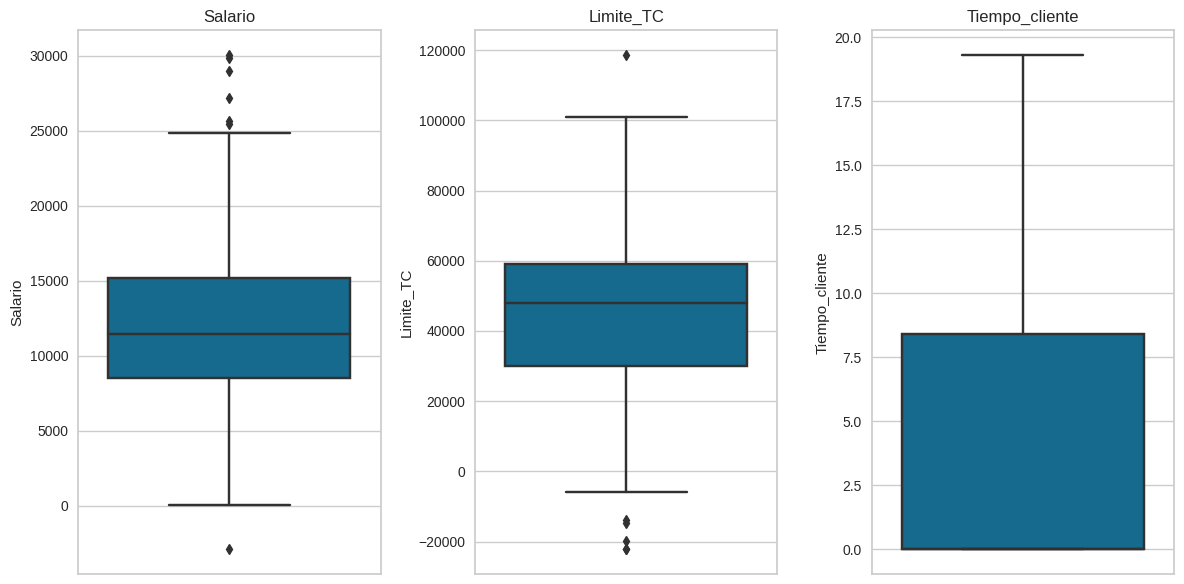

In [ ]:
# Se crea el lienzo de gráficos
plt.figure(figsize=(12, 6))

# Se grafican los boxplots de Salario, Limite_TC y Tiempo_cliente
plt.subplot(1, 3, 1)
sns.boxplot(y=df_customers['Salario'])
plt.title('Salario')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_customers['Limite_TC'])
plt.title('Limite_TC')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_customers['Tiempo_cliente'])
plt.title('Tiempo_cliente')

# Se muestran los boxplots
plt.tight_layout()
plt.show()


Los límites inferiores de las cajas (Q1): representan el primer cuartil (Q1), es decir, el valor por debajo del cual se encuentra el 25% de los datos. En el caso de Salario el valor corresponde a 8534.35, en tanto que, para Limite_TC vale 30096.285 y para Tiempo_cliente 0.
La línea en el medio de la caja es la mediana (segundo cuartil o Q2), que indica el valor que separa el 50% inferior del 50% superior de los datos. En Salario su valor es 11438.6, en Limite_TC es 47991.5150 y en Tiempo_cliente es 0.
El borde superior de la caja representa el tercer cuartil (Q3), donde se ubica el 75% de los datos. En Salario vale 15171.4675, en Limite_TC es 59108.1750 y en Tiempo_cliente es 8.40.
Los puntos fuera de los bigotes se representan como valores atípicos o outliers. Estos son valores que caen significativamente por encima o por debajo del rango intercuartílico (normalmente 1.5 veces el IQR). Los boxplots de las variables: Salario y Limite_TC tienen outliers tanto por debajo como por encima de los bigotes. La gráfica de caja de Tiempo_cliente no presenta outliers.


En el gráfico de la variable Salario se observa la presencia de un valor negativo. Consideramos que puede haber sido un error de quien capturo los datos inicialmente en la base de datos. Sugerimos imputar ese valor como cero, para que no afecte a los estadísticos descriptivos, en esa variable, así como el posterior modelo de clasificación que construiremos.
Si observamos el boxplot de la variable Limite_TC se detecta la presencia de varios valores negativos. En principio no parece lógico que alguien tenga un límite de crédito negativo, o tiene 0 o un valor entero positivo. Pero se debe consultar con el cliente si esto es así o efectivamente tiene un significado el valor negativo en el límite de la tarjeta de crédito.
En lo que sigue haremos una copia del data frame original, conservando los datos originales por un lado e imputando los valores negativos como 0 en otro data frame.
Posteriormente se compararán los resultados a los que se llegan siguiendo el camino de mantener los valores negativos o imputándolos como 0.

In [ ]:
# Se hace una copia del DataFrame df_customers(utilizando el método copy de Pandas) para posteriormente imputar como 0 a los valores negativos.
df_customers_copia = df_customers.copy()

# **A continuación se imputan como cero los valores negativos de Salario y Limite_TC en la copia del data frame original**

In [ ]:
"""
Esta línea utiliza loc para filtrar las filas donde el valor en la columna 'Salario' es menor que cero y
los reemplaza por cero. Es una manera de eliminar valores negativos en la columna 'Salario'
y establecerlos en cero.

"""
df_customers_copia.loc[df_customers_copia['Salario'] < 0, 'Salario'] = 0

"""
Similar al paso anterior, esta línea selecciona las filas donde el valor en la columna 'Limite_TC'
es menor que cero y los sustituye por cero, eliminando así los valores negativos en esa columna.

"""
df_customers_copia.loc[df_customers_copia['Limite_TC'] < 0, 'Limite_TC'] = 0


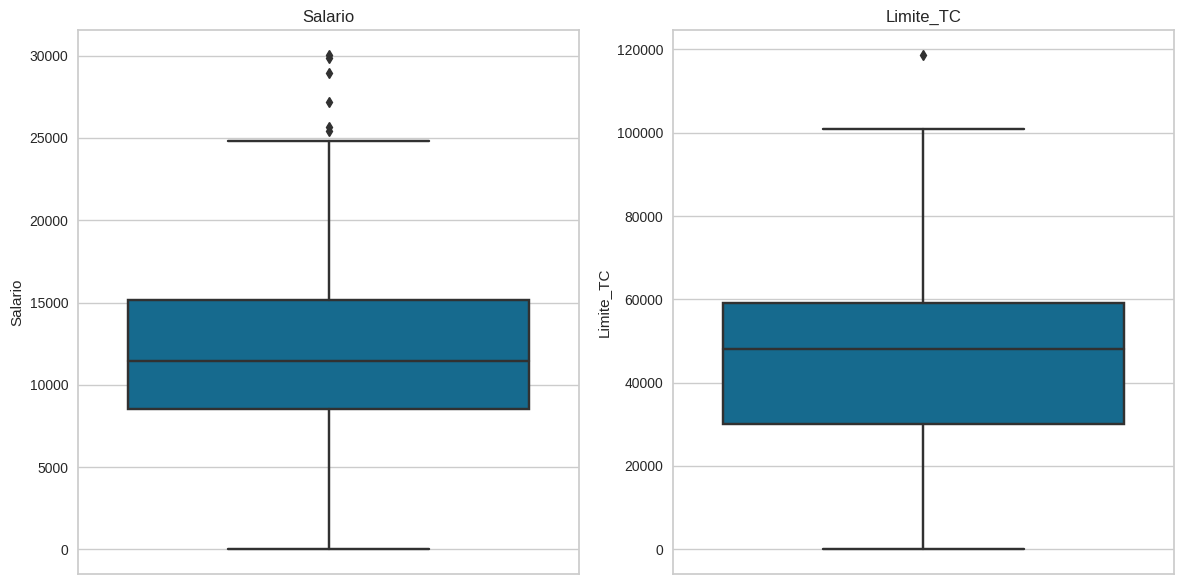

In [ ]:
# Se crea el lienzo de gráficos
plt.figure(figsize=(12, 6))

# Se grafican los boxplots de Salario, Limite_TC y Tiempo_cliente
plt.subplot(1, 2, 1)
sns.boxplot(y=df_customers_copia['Salario'])
plt.title('Salario')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_customers_copia['Limite_TC'])
plt.title('Limite_TC')

# Se muestran los boxplots
plt.tight_layout()
plt.show()


Se observa claramente en ambos gráficos que ya no hay valores negativos en las variables Salario y Limite_TC del data frame df_customers_copia.

# **Diseño y aplicación del modelo de clustering sin imputar a cero los valores negativos en las variables Salario y Limite_TC**

In [ ]:
"""
Este código se encarga de preparar los datos para el clustering al seleccionar un subconjunto
de variables cuantitativas ('Salario', 'Limite_TC', 'Tiempo_cliente') del DataFrame df_customers
y luego escalar esas variables para garantizar que todas tengan la misma importancia en el análisis.

Selección de variables cuantitativas:
Se define una lista llamada features que contiene los nombres de las variables cuantitativas
que se utilizarán para el clustering.
Se eligen 'Salario', 'Limite_TC', y 'Tiempo_cliente'. Estas son las características cuantitativas
que se considerarán en el análisis.

"""
features = ['Salario', 'Limite_TC', 'Tiempo_cliente']

In [ ]:
"""
Preprocesamiento de datos - Escalado:
Se importa StandardScaler de la librería sklearn.preprocessing. Este escalador se usa para estandarizar las características
eliminando la media y escalando a la varianza unitaria.

Ajuste y transformación de datos:
Se crea una instancia del StandardScaler llamada scaler. Luego se aplica este escalador a las características seleccionadas
(df_customers[features]) mediante el método fit_transform. Este método calcula la media y la desviación estándar de cada
característica y las utiliza para escalar y centrar los datos.

El resultado se almacena en scaled_data, que contendrá las características escaladas ('Salario', 'Limite_TC', 'Tiempo_cliente')
listas para ser utilizadas en algoritmos de clustering.

"""
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_customers[features])

El escalado de variables es crucial para el clustering, ya que algunos algoritmos pueden verse afectados por diferencias en las escalas de las características. Al estandarizar los datos, se asegura que todas las características contribuyan de manera equitativa al análisis y se reduce el impacto de las diferencias de escala entre las variables.

Seguidamente se aplica el Análisis de Componentes Principales (PCA) a los datos que han sido previamente escalados (scaled_data). El PCA es una técnica de reducción de dimensionalidad que busca transformar el conjunto de datos original en un nuevo conjunto de variables (llamadas componentes principales) que son combinaciones lineales de las características originales, con la intención de capturar la mayor cantidad posible de la variabilidad de los datos originales en menos dimensiones.

In [ ]:
"""
Inicialización del PCA:
Se importa la clase PCA desde sklearn.decomposition. Luego se crea una instancia de PCA llamada pca.

Especificación del número de componentes:
Se establece el número de componentes principales a los que se reducirán los datos mediante el parámetro n_components.
En este caso, se elige n_components=2, lo que significa que se quiere reducir la dimensionalidad de los datos a dos
componentes principales. Esto es común cuando se quiere visualizar datos en un espacio bidimensional, aunque en aplicaciones
más complejas, la elección de este número puede variar.

"""
pca = PCA(n_components=2)

"""
Transformación de los datos con PCA:
Se aplica PCA a los datos escalados (scaled_data) usando el método fit_transform. Este método ajusta el modelo PCA a los datos
y luego transforma el conjunto de datos original a un nuevo conjunto de datos representado por los componentes principales.

El resultado de esta transformación se almacena en pca_data, que ahora contiene las proyecciones de los datos originales
en el espacio definido por los dos componentes principales.

"""
pca_data = pca.fit_transform(scaled_data)

Al reducir la dimensionalidad a solo dos componentes principales, se simplifica la representación de los datos para propósitos de visualización, ya que se pueden graficar en un plano bidimensional. Esto es útil para comprender la estructura de los datos o para visualizar patrones que podrían no ser evidentes en dimensiones más altas.

In [ ]:
"""
Este código en Python realiza un análisis de agrupamiento (clustering) utilizando el algoritmo K-Means sobre un conjunto de datos
que previamente ha sido reducido en dimensionalidad mediante PCA (Análisis de Componentes Principales).

Aquí hay una explicación línea por línea:

k_rango = range(1, 11): Se crea un rango de valores para el parámetro k, que indica el número de clusters que se probarán en el algoritmo K-Means.
En este caso, va desde 1 hasta 10 (incluyendo 1 pero no incluyendo 11).

inercias = []: Se inicializa una lista vacía llamada inercias donde se almacenarán los valores de la inercia para cada valor de k.
La inercia es la suma de las distancias al cuadrado de las muestras a su centroide más cercano en un clúster.

El bucle for k in k_rango: recorre cada valor en el rango de k definido anteriormente.

Dentro del bucle, se crea un objeto KMeans con n_clusters = k y random_state = 123. Este objeto representa el algoritmo K-Means
con un número específico de clusters (k) y un estado aleatorio fijo para reproducibilidad (random_state).

kmeans.fit(pca_data): Se ajusta el modelo K-Means a los datos que han sido preprocesados usando PCA (pca_data).
Esto significa que el algoritmo intentará encontrar k clusters en base a la estructura de los datos de entrada.

inercias.append(kmeans.inertia_): Después de ajustar el modelo K-Means, se obtiene la inercia del modelo (kmeans.inertia_)
y se agrega a la lista inercias. Esto permite hacer un seguimiento de cómo cambia la inercia en función del número de clusters (k).


Al finalizar este código, la lista inercias contendrá las inercias para cada valor de k probado, lo que puede ayudar
a determinar el número óptimo de clusters para esos datos. Esto se puede visualizar gráficamente (por ejemplo, trazando
la inercia frente a los valores de k) para identificar el "codo" en la curva, lo que puede indicar el número óptimo de clusters.

"""
k_rango = range(1, 11)
inercias = []

for k in k_rango:
    kmeans = KMeans(n_clusters = k, random_state = 123)
    kmeans.fit(pca_data)
    inercias.append(kmeans.inertia_)

In [ ]:
"""
El código print(inercias) simplemente imprime en la consola los valores de inercia que se han recolectado durante el proceso de ajuste
del modelo K-Means para diferentes valores de k.

Después de ejecutar el bucle for que calcula las inercias para cada valor de k y las almacena en la lista inercias, al ejecutar print(inercias),
se puede ver una lista impresa en la consola que contiene todos estos valores de inercia. Esta lista muestra cómo varían las inercias a medida
que cambia el número de clusters evaluados.

"""
print(inercias)

[1383.0733305020935, 710.3912683553042, 480.2444232478847, 368.619067938894, 310.5883495852211, 257.1007734204995, 223.03188078398642, 195.43041266561076, 174.94416868748726, 160.50440037232687]


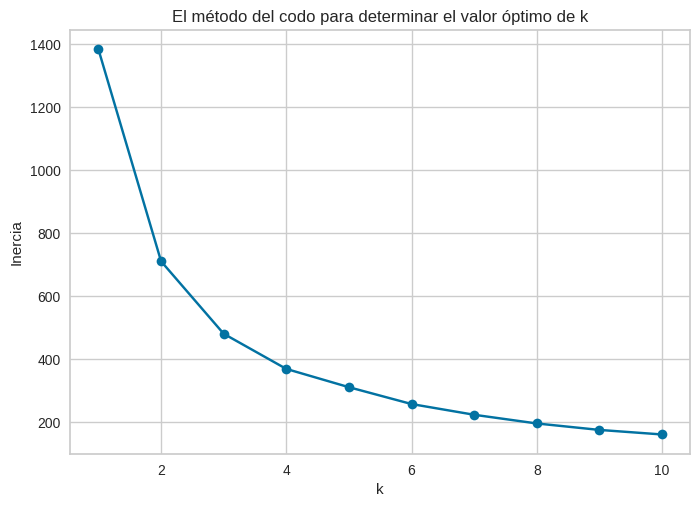

In [ ]:
"""
Este código utiliza la librería Matplotlib para crear un gráfico que muestra cómo varía la inercia en función del número de clusters (k)
que se han evaluado en el algoritmo K-Means.

plt.plot(k_rango, inercias, 'bo-'): Esta línea crea un gráfico de línea utilizando Matplotlib. Toma dos listas como entrada: k_rango
(los valores de k que se probaron) y inercias (las inercias correspondientes a cada valor de k). La letra 'bo-' le indica a Matplotlib
que dibuje puntos azules ('b' para blue) conectados por líneas ('o-' indica puntos circulares y líneas). Este tipo de gráfico se usa
comúnmente para representar el "método del codo" en la determinación del número óptimo de clusters.

plt.xlabel('k'): Establece la etiqueta del eje x del gráfico como 'k', que representa el número de clusters.

plt.ylabel('Inercia'): Establece la etiqueta del eje y del gráfico como 'Inercia', que representa los valores de inercia obtenidos
durante el clustering.

plt.title('El método del codo para determinar el valor óptimo de k'): Define el título del gráfico como 'El método del codo para
determinar el valor óptimo de k'. En el análisis de clustering, el método del codo se usa para identificar el número óptimo de clusters
observando la disminución de la inercia en función del número de clusters.

plt.show(): Muestra el gráfico completo en una ventana emergente o en el entorno de ejecución actual, dependiendo de
donde se esté ejecutando el código.

En resumen, este código genera un gráfico que representa visualmente la inercia en función del número de clusters (k) probados,
lo que permite identificar el punto en el que la inercia disminuye significativamente o se estabiliza, ayudando a determinar
el número óptimo de clusters para el conjunto de datos dado.

"""
plt.plot(k_rango, inercias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('El método del codo para determinar el valor óptimo de k')
plt.show()

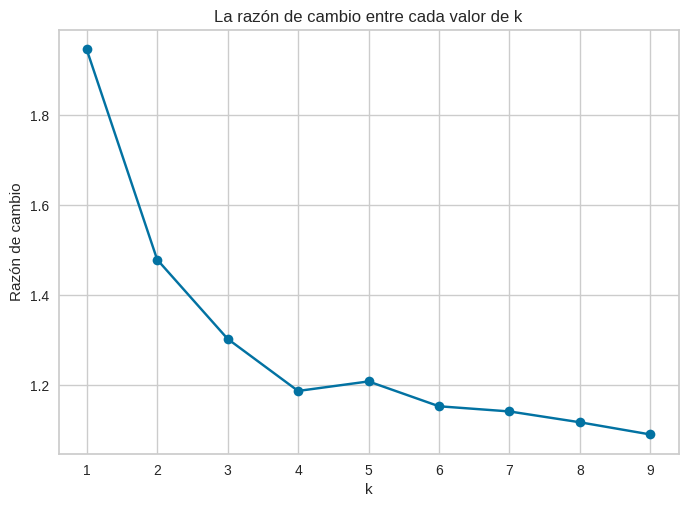

In [ ]:
"""
Este fragmento de código realiza dos cosas:

Calcula la razón de cambio entre los valores de inercia consecutivos.
Grafica la razón de cambio en función del número de clusters (k).

"""
"""
razon_cambio = [inercias[i] / inercias[i+1] for i in range(len(inercias) - 1)]: Esto calcula la razón de cambio entre cada par
consecutivo de valores de inercia en la lista inercias. Utiliza una comprensión de lista y un bucle for para iterar sobre los índices
de la lista inercias. Calcula la razón entre cada elemento inercias[i] y el siguiente elemento inercias[i+1], almacenando esos valores
en la lista razon_cambio. Al final, muestra la lista razon_cambio, que contiene las razones de cambio entre valores consecutivos de inercia.

"""
razon_cambio = [inercias[i] / inercias[i+1] for i in range(len(inercias) - 1)]
razon_cambio

"""
plt.plot(k_rango[:-1], razon_cambio, 'bo-'): Aquí se utiliza Matplotlib para crear un gráfico de línea. k_rango[:-1] se refiere al rango de valores
de k excepto el último valor, ya que la lista razon_cambio tiene un elemento menos que k_rango. Se grafica la razón de cambio (razon_cambio) en función
de estos valores de k. El 'bo-' indica puntos azules ('b' para blue) unidos por líneas ('o-' indica puntos circulares y líneas) en el gráfico.

plt.xlabel('k'): Establece la etiqueta del eje x del gráfico como 'k', que representa el número de clusters.

plt.ylabel('Razón de cambio'): Establece la etiqueta del eje y del gráfico como 'Razón de cambio', que representa la razón de cambio
entre los valores de inercia consecutivos.

plt.title('La razón de cambio entre cada valor de k'): Define el título del gráfico como 'La razón de cambio entre cada valor de k'.

plt.show(): Muestra el gráfico completo en una ventana emergente o en el entorno de ejecución actual.

"""


plt.plot(k_rango[:-1], razon_cambio, 'bo-')
plt.xlabel('k')
plt.ylabel('Razón de cambio')
plt.title('La razón de cambio entre cada valor de k')
plt.show()

In [ ]:
"""
Este código utiliza la biblioteca Yellowbrick, que proporciona herramientas visuales para el análisis de datos y,
en este caso específico, para ayudar a determinar el número óptimo de clusters mediante el método del codo.

"""

"""
Se importa la clase KElbowVisualizer de la biblioteca yellowbrick.cluster. Esta clase se utiliza para visualizar
el método del codo y ayudar a seleccionar el número óptimo de clusters en un modelo de clustering.

"""
from yellowbrick.cluster import KElbowVisualizer

"""
Se instancia un objeto KElbowVisualizer llamado visualizer. Se pasa como parámetro el modelo de K-Means (kmeans)
que se ha creado previamente y se especifica el rango de valores k que se probarán para el método del codo. En este caso,
se prueba desde 1 hasta 10 clusters (k = (1, 11)). La visualización resultante mostrará la inercia en función del número de
clusters en un gráfico y ayudará a identificar el codo, es decir, el punto donde la inercia deja de disminuir rápidamente
y comienza a estabilizarse.

"""
visualizer = KElbowVisualizer(kmeans, k = (1, 11))


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=123),
                 k=(1, 11))

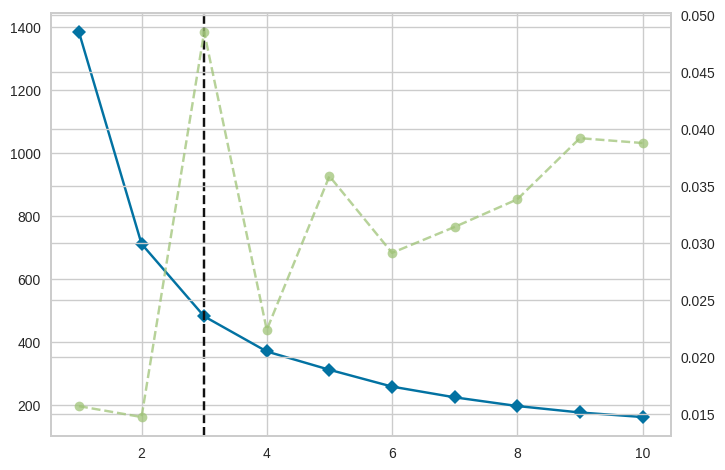

In [ ]:
"""
Se realiza el ajuste del modelo K-Means utilizando los datos transformados por PCA y se muestra la visualización
interactiva generada por la función KElbowVisualizer.

visualizer.fit(pca_data): Esta línea de código ajusta el modelo K-Means a los datos transformados por PCA (pca_data).
La función fit() se utiliza para entrenar el modelo con estos datos. En este contexto, el modelo K-Means se ajustará con
diferentes números de clusters (k) según el rango especificado previamente para determinar el número óptimo de clusters
utilizando el método del codo.
Una vez que se ejecuta esta línea de código, la visualización generada por KElbowVisualizer mostrará la relación entre el
número de clusters y la inercia, lo que facilitará la identificación del punto donde la inercia comienza a estabilizarse,
ayudando así a determinar el número óptimo de clusters para el conjunto de datos proporcionado.

"""
visualizer.fit(pca_data)

In [ ]:
"""
visualizer.show(): Esta línea de código muestra la visualización interactiva generada por la función KElbowVisualizer.
Después de ajustar el modelo K-Means a los datos y calcular la inercia para diferentes valores de k, la visualización muestra
un gráfico que representa la relación entre el número de clusters y la inercia.
La visualización proporciona una representación gráfica que ayuda a identificar el punto en el que la disminución de la inercia
se estabiliza o se reduce significativamente, lo que se conoce como el "codo". Este punto puede indicar el número óptimo de clusters
para el conjunto de datos dado. Al mostrar la visualización, se obtiene una representación gráfica que facilita la elección del valor
óptimo de k basado en el método del codo.

En algunos entornos o notebooks interactivos como Jupyter Notebook, Colab o ciertas interfaces de desarrollo, la visualización puede
mostrarse automáticamente después de ejecutar fit() sin necesidad de visualizer.show() debido a la configuración específica de esos entornos.

Si en tu entorno particular el gráfico se muestra automáticamente después de ejecutar fit(), es probable que la llamada a visualizer.show()
no sea necesaria. Pero si no se muestra automáticamente, agregar visualizer.show() es crucial para visualizar la representación interactiva
del método del codo y determinar el valor óptimo de clusters.

"""
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

Después de ejecutar este código, inertia contiene la variación intra-cluster (suma de distancias al cuadrado) para cada número de clusters probados. Al representar gráficamente estos valores en función de los diferentes valores de k, se puede identificar el punto en el que la disminución de la inercia comienza a aplanarse, lo que se conoce como el codo en la gráfica. El número de clusters en este punto puede considerarse como el número óptimo de clusters para el conjunto de datos en cuestión. En este caso se observa que 3 es el número óptimo.

In [ ]:
"""
Se establece el número óptimo de clusters en la variable optimal_k (en este caso, se ha fijado en 3,
valor que ha sido determinado mediante el método del codo).

"""
optimal_k = 3

"""
Se inicializa el algoritmo K-means con el número de clusters especificado en optimal_k.

"""
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

"""
Se aplica el algoritmo K-means al conjunto de datos reducidos por PCA mediante el método fit_predict(), que ajusta el modelo
a los datos y devuelve las etiquetas de los clusters a los que se asigna cada punto de datos.

El resultado en la variable clusters contendrá las etiquetas de cluster asignadas a cada punto de datos en pca_data
después de aplicar el algoritmo K-means con el número óptimo de clusters especificado.

"""
clusters = kmeans.fit_predict(pca_data)

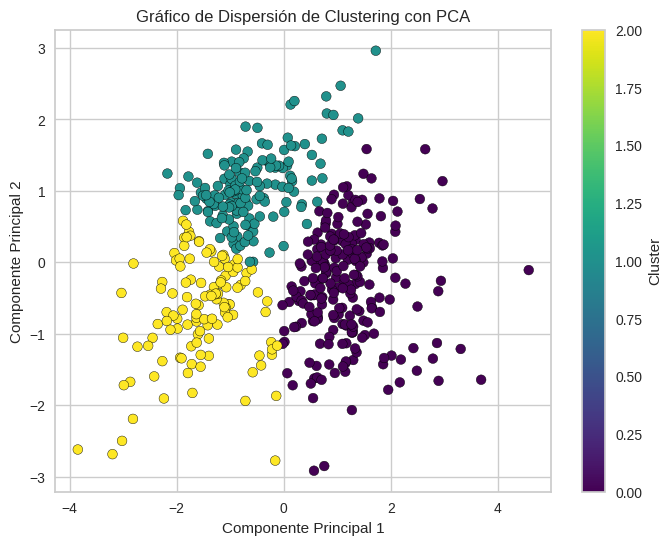

In [ ]:
# Se visualizan los clusters en un gráfico de dispersión con datos reducidos por PCA.

"""
plt.figure(figsize=(8, 6)) configura el tamaño de la figura del gráfico en pulgadas (ancho x alto).

"""
plt.figure(figsize=(8, 6))

"""
plt.scatter() crea un gráfico de dispersión. Los argumentos son los datos de las componentes principales
(pca_data[:, 0] para el eje x y pca_data[:, 1] para el eje y), y c=clusters asigna colores
basados en las etiquetas de los clusters.

"""
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')

"""
Se establecen el título del gráfico y las etiquetas de los ejes x e y mediante plt.title(), plt.xlabel(),
y plt.ylabel() respectivamente.

"""
plt.title('Gráfico de Dispersión de Clustering con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

"""
plt.colorbar(label='Cluster') agrega una barra de color que mapea los colores a los clusters identificados.

"""
plt.colorbar(label='Cluster')

"""
plt.show() muestra el gráfico de dispersión.

"""

plt.show()

In [ ]:
"""
print(f'Inercia: {kmeans.inertia_}'): La inercia (inertia_) es una medida de la cohesión de los clusters
en el modelo K-means. Es la suma de las distancias al cuadrado de todas las muestras a sus centroides respectivos
en los clusters. Cuanto menor sea la inercia, mejor será la partición de los datos en clusters.

"""
print(f'Inercia: {kmeans.inertia_}')


Inercia: 480.2444232478847


In [ ]:
"""
Este código utiliza la función silhouette_score de la librería sklearn.metrics para calcular el
puntaje de silhouette de un modelo de clustering (en este caso, un modelo K-Means) en base a los
datos y las etiquetas de los clusters.

"""
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)


In [ ]:
"""
Aquí se imprime en pantalla el valor almacenado en la variable silhouette_avg, mostrando el puntaje
de silhouette calculado para nuestro modelo de clustering.

"""
print("El puntaje de Silhouette es:", silhouette_avg)

El puntaje de Silhouette es: 0.44062974488113615


In [ ]:
"""
Lo que hace este código es agregar una nueva columna llamada 'cluster' al DataFrame df_customers
y asignar los valores de la variable clusters a esta nueva columna. Cada valor en la columna 'cluster'
corresponderá a la etiqueta del cluster al que se asignó cada fila del DataFrame df_customers después
de aplicar el algoritmo K-Means. Esto facilita el análisis y la segmentación de los datos basados
en los clusters identificados.

"""
df_customers['cluster']= clusters

In [ ]:
# Se realiza un perfilamiento de los clusters, para lo cual se calculan sus estadísticas descriptivas.
cluster_stats = df_customers.groupby('cluster').agg(['mean','min','max','std'])
print("Estadísticas por cluster:")
print(cluster_stats)


Estadísticas por cluster:
              Salario                                  Credito_tipo_1          \
                 mean       min       max          std           mean min max   
cluster                                                                         
0        11369.397555    250.61  23958.32  3972.745905       0.672489   0   1   
1         8315.025772  -2911.65  14264.00  2885.685590       0.429530   0   1   
2        18049.326311  11432.87  30041.40  3741.808455       0.713115   0   1   

                  Credito_tipo_2                       Limite_TC            \
              std           mean min max       std          mean       min   
cluster                                                                      
0        0.470333       0.414847   0   1  0.493775  61266.810262  40067.41   
1        0.496679       0.765101   0   1  0.425366  36419.715570 -14786.24   
2        0.454173       0.163934   0   1  0.371743  24062.625492 -22207.95   

                  

# **Diseño y aplicación de modelo de clustering con los valores negativos en las variables Salario y Limite_TC imputados con el valor cero**

In [ ]:
"""
Este código se encarga de preparar los datos para el clustering al seleccionar un subconjunto
de variables cuantitativas ('Salario', 'Limite_TC', 'Tiempo_cliente') del DataFrame df_customers_copia
y luego escalar esas variables para garantizar que todas tengan la misma importancia en el análisis.

Selección de variables cuantitativas:
Se define una lista llamada features_copia que contiene los nombres de las variables cuantitativas
que se utilizarán para el clustering.
Se eligen 'Salario', 'Limite_TC', y 'Tiempo_cliente'. Estas son las características cuantitativas
que se considerarán en el análisis.

"""
features_copia = ['Salario', 'Limite_TC', 'Tiempo_cliente']

In [ ]:
"""
Preprocesamiento de datos - Escalado:
Se importa StandardScaler de la librería sklearn.preprocessing. Este escalador se usa para estandarizar las características
eliminando la media y escalando a la varianza unitaria.

Ajuste y transformación de datos:
Se crea una instancia del StandardScaler llamada scaler_copia. Luego se aplica este escalador a las características seleccionadas
(df_customers_copia[features_copia]) mediante el método fit_transform. Este método calcula la media y la desviación estándar de cada
característica y las utiliza para escalar y centrar los datos.

El resultado se almacena en scaled_data_copia, que contendrá las características escaladas ('Salario', 'Limite_TC', 'Tiempo_cliente')
listas para ser utilizadas en algoritmos de clustering.

"""
scaler_copia = StandardScaler()
scaled_data_copia = scaler.fit_transform(df_customers_copia[features_copia])

In [ ]:
"""
Inicialización del PCA:
Se importa la clase PCA desde sklearn.decomposition. Luego se crea una instancia de PCA llamada pca_copia.

Especificación del número de componentes:
Se establece el número de componentes principales a los que se reducirán los datos mediante el parámetro n_components.
En este caso, se elige n_components=2, lo que significa que se quiere reducir la dimensionalidad de los datos a dos
componentes principales. Esto es común cuando se quiere visualizar datos en un espacio bidimensional, aunque en aplicaciones
más complejas, la elección de este número puede variar.

"""
pca_copia = PCA(n_components=2)

"""
Transformación de los datos con PCA:
Se aplica PCA a los datos escalados (scaled_data_copia) usando el método fit_transform. Este método ajusta el modelo PCA a los datos
y luego transforma el conjunto de datos original a un nuevo conjunto de datos representado por los componentes principales.

El resultado de esta transformación se almacena en pca_data_copia, que ahora contiene las proyecciones de los datos originales
en el espacio definido por los dos componentes principales.

"""
pca_data_copia = pca_copia.fit_transform(scaled_data_copia)

In [ ]:
"""
Este código en Python realiza un análisis de agrupamiento (clustering) utilizando el algoritmo K-Means sobre un conjunto de datos
que previamente ha sido reducido en dimensionalidad mediante PCA (Análisis de Componentes Principales).

Aquí hay una explicación línea por línea:

k_rango_copia = range(1, 11): Se crea un rango de valores para el parámetro k, que indica el número de clusters que se probarán en el algoritmo K-Means.
En este caso, va desde 1 hasta 10 (incluyendo 1 pero no incluyendo 11).

inercias_copia = []: Se inicializa una lista vacía llamada inercias_copia donde se almacenarán los valores de la inercia para cada valor de k.
La inercia es la suma de las distancias al cuadrado de las muestras a su centroide más cercano en un clúster.

El bucle for k in k_rango_copia: recorre cada valor en el rango de k definido anteriormente.

Dentro del bucle, se crea un objeto KMeans con n_clusters = k y random_state = 123. Este objeto representa el algoritmo K-Means
con un número específico de clusters (k) y un estado aleatorio fijo para reproducibilidad (random_state).

kmeans_copia.fit(pca_data_copia): Se ajusta el modelo K-Means a los datos que han sido preprocesados usando PCA (pca_data_copia).
Esto significa que el algoritmo intentará encontrar k clusters en base a la estructura de los datos de entrada.

inercias_copia.append(kmeans_copia.inertia_): Después de ajustar el modelo K-Means, se obtiene la inercia del modelo (kmeans_copia.inertia_)
y se agrega a la lista inercias_copia. Esto permite hacer un seguimiento de cómo cambia la inercia en función del número de clusters (k).

Al finalizar este código, la lista inercias_copia contendrá las inercias para cada valor de k probado, lo que puede ayudar
a determinar el número óptimo de clusters para esos datos. Esto se puede visualizar gráficamente (por ejemplo, trazando
la inercia frente a los valores de k) para identificar el "codo" en la curva, lo que puede indicar el número óptimo de clusters.

"""
k_rango_copia = range(1, 11)
inercias_copia = []

for k in k_rango_copia:
    kmeans_copia = KMeans(n_clusters = k, random_state = 123)
    kmeans_copia.fit(pca_data_copia)
    inercias_copia.append(kmeans_copia.inertia_)

In [ ]:
"""
El código print(inercias_copia) simplemente imprime en la consola los valores de inercia que se han recolectado durante el proceso de ajuste
del modelo K-Means para diferentes valores de k.

Después de ejecutar el bucle for que calcula las inercias para cada valor de k y las almacena en la lista inercias_copia, al ejecutar print(inercias_copia),
se puede ver una lista impresa en la consola que contiene todos estos valores de inercia. Esta lista muestra cómo varían las inercias a medida
que cambia el número de clusters evaluados.

"""
print(inercias_copia)

[1385.7994934727478, 705.7795020964227, 477.0852885342899, 363.9395730322567, 307.74430567807804, 252.97545420256571, 219.82845542708048, 192.36053782482006, 171.13054369141076, 156.94250276138]


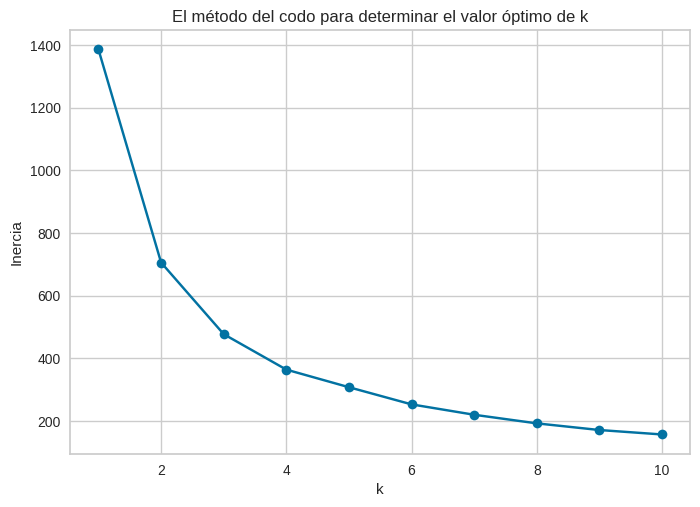

In [ ]:
"""
Este código utiliza la librería Matplotlib para crear un gráfico que muestra cómo varía la inercia en función del número de clusters (k)
que se han evaluado en el algoritmo K-Means.

plt.plot(k_rango_copia, inercias_copia, 'bo-'): Esta línea crea un gráfico de línea utilizando Matplotlib. Toma dos listas como entrada: k_rango_copia
(los valores de k que se probaron) y inercias_copia (las inercias correspondientes a cada valor de k). La letra 'bo-' le indica a Matplotlib
que dibuje puntos azules ('b' para blue) conectados por líneas ('o-' indica puntos circulares y líneas). Este tipo de gráfico se usa
comúnmente para representar el "método del codo" en la determinación del número óptimo de clusters.

plt.xlabel('k'): Establece la etiqueta del eje x del gráfico como 'k', que representa el número de clusters.

plt.ylabel('Inercia'): Establece la etiqueta del eje y del gráfico como 'Inercia', que representa los valores de inercia obtenidos
durante el clustering.

plt.title('El método del codo para determinar el valor óptimo de k'): Define el título del gráfico como 'El método del codo para
determinar el valor óptimo de k'. En el análisis de clustering, el método del codo se usa para identificar el número óptimo de clusters
observando la disminución de la inercia en función del número de clusters.

plt.show(): Muestra el gráfico completo en una ventana emergente o en el entorno de ejecución actual, dependiendo de
donde se esté ejecutando el código.

En resumen, este código genera un gráfico que representa visualmente la inercia en función del número de clusters (k) probados,
lo que permite identificar el punto en el que la inercia disminuye significativamente o se estabiliza, ayudando a determinar
el número óptimo de clusters para el conjunto de datos dado.

"""
plt.plot(k_rango_copia, inercias_copia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('El método del codo para determinar el valor óptimo de k')
plt.show()

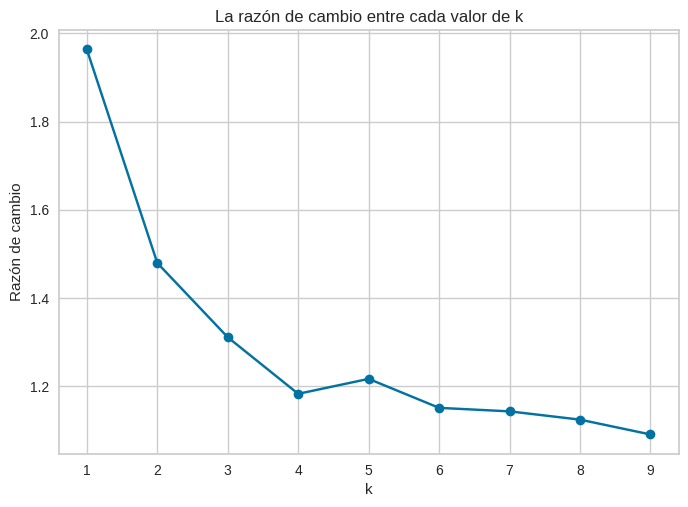

In [ ]:
"""
Este fragmento de código realiza dos cosas:

Calcula la razón de cambio entre los valores de inercia consecutivos.
Grafica la razón de cambio en función del número de clusters (k).

"""
"""
razon_cambio_copia = [inercias_copia[i] / inercias_copia[i+1] for i in range(len(inercias_copia) - 1)]: Esto calcula la razón de cambio entre cada par
consecutivo de valores de inercia en la lista inercias_copia. Utiliza una comprensión de lista y un bucle for para iterar sobre los índices
de la lista inercias_copia. Calcula la razón entre cada elemento inercias_copia[i] y el siguiente elemento inercias_copia[i+1], almacenando esos valores
en la lista razon_cambio_copia. Al final, muestra la lista razon_cambio_copia, que contiene las razones de cambio entre valores consecutivos de inercia.

"""
razon_cambio_copia = [inercias_copia[i] / inercias_copia[i+1] for i in range(len(inercias_copia) - 1)]
razon_cambio_copia

"""
plt.plot(k_rango_copia[:-1], razon_cambio_copia, 'bo-'): Aquí se utiliza Matplotlib para crear un gráfico de línea. k_rango_copia[:-1]
se refiere al rango de valores de k excepto el último valor, ya que la lista razon_cambio_copia tiene un elemento menos que k_rango_copia.
Se grafica la razón de cambio (razon_cambio_copia) en función de estos valores de k. El 'bo-' indica puntos azules ('b' para blue)
unidos por líneas ('o-' indica puntos circulares y líneas) en el gráfico.

plt.xlabel('k'): Establece la etiqueta del eje x del gráfico como 'k', que representa el número de clusters.

plt.ylabel('Razón de cambio'): Establece la etiqueta del eje y del gráfico como 'Razón de cambio', que representa la razón de cambio
entre los valores de inercia consecutivos.

plt.title('La razón de cambio entre cada valor de k'): Define el título del gráfico como 'La razón de cambio entre cada valor de k'.

plt.show(): Muestra el gráfico completo en una ventana emergente o en el entorno de ejecución actual.

"""

plt.plot(k_rango_copia[:-1], razon_cambio_copia, 'bo-')
plt.xlabel('k')
plt.ylabel('Razón de cambio')
plt.title('La razón de cambio entre cada valor de k')
plt.show()

In [ ]:
"""
Este código utiliza la biblioteca Yellowbrick, que proporciona herramientas visuales para el análisis de datos y,
en este caso específico, para ayudar a determinar el número óptimo de clusters mediante el método del codo.

"""

"""
Se importa la clase KElbowVisualizer de la biblioteca yellowbrick.cluster. Esta clase se utiliza para visualizar
el método del codo y ayudar a seleccionar el número óptimo de clusters en un modelo de clustering.

"""
from yellowbrick.cluster import KElbowVisualizer

"""
Se instancia un objeto KElbowVisualizer llamado visualizer_copia. Se pasa como parámetro el modelo de K-Means (kmeans_copia)
que se ha creado previamente y se especifica el rango de valores k que se probarán para el método del codo. En este caso,
se prueba desde 1 hasta 10 clusters (k = (1, 11)). La visualización resultante mostrará la inercia en función del número de
clusters en un gráfico y ayudará a identificar el codo, es decir, el punto donde la inercia deja de disminuir rápidamente
y comienza a estabilizarse.

"""
visualizer_copia = KElbowVisualizer(kmeans_copia, k = (1, 11))


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=123),
                 k=(1, 11))

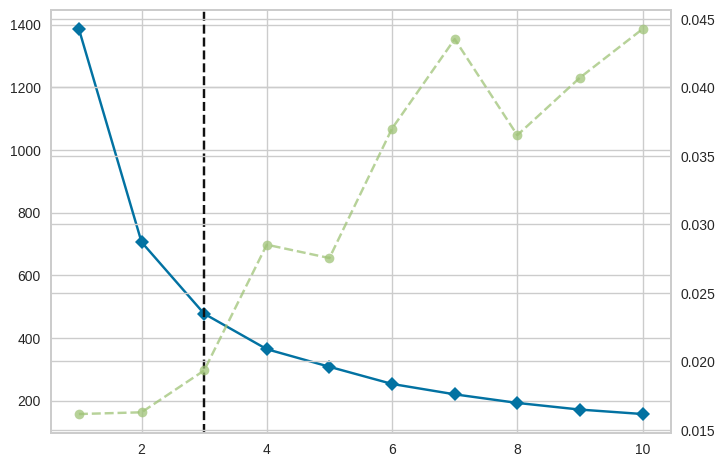

In [ ]:
"""
Se realiza el ajuste del modelo K-Means utilizando los datos transformados por PCA y se muestra la visualización
interactiva generada por la función KElbowVisualizer.

visualizer_copia.fit(pca_data_copia): Esta línea de código ajusta el modelo K-Means a los datos transformados por PCA (pca_data_copia).
La función fit() se utiliza para entrenar el modelo con estos datos. En este contexto, el modelo K-Means se ajustará con
diferentes números de clusters (k) según el rango especificado previamente para determinar el número óptimo de clusters
utilizando el método del codo.
Una vez que se ejecuta esta línea de código, la visualización generada por KElbowVisualizer mostrará la relación entre el
número de clusters y la inercia, lo que facilitará la identificación del punto donde la inercia comienza a estabilizarse,
ayudando así a determinar el número óptimo de clusters para el conjunto de datos proporcionado.

"""
visualizer_copia.fit(pca_data_copia)

In [ ]:
"""
Se establece el número óptimo de clusters en la variable optimal_k_copia (en este caso, se ha fijado en 3,
valor que ha sido determinado mediante el método del codo).

"""
optimal_k_copia = 3

"""
Se inicializa el algoritmo K-means con el número de clusters especificado en optimal_k.

"""
kmeans_copia = KMeans(n_clusters=optimal_k_copia, random_state=42)

"""
Se aplica el algoritmo K-means al conjunto de datos reducidos por PCA mediante el método fit_predict(), que ajusta el modelo
a los datos y devuelve las etiquetas de los clusters a los que se asigna cada punto de datos.

El resultado en la variable clusters_copia contendrá las etiquetas de cluster asignadas a cada punto de datos en pca_data_copia
después de aplicar el algoritmo K-means con el número óptimo de clusters especificado.

"""
clusters_copia = kmeans_copia.fit_predict(pca_data_copia)

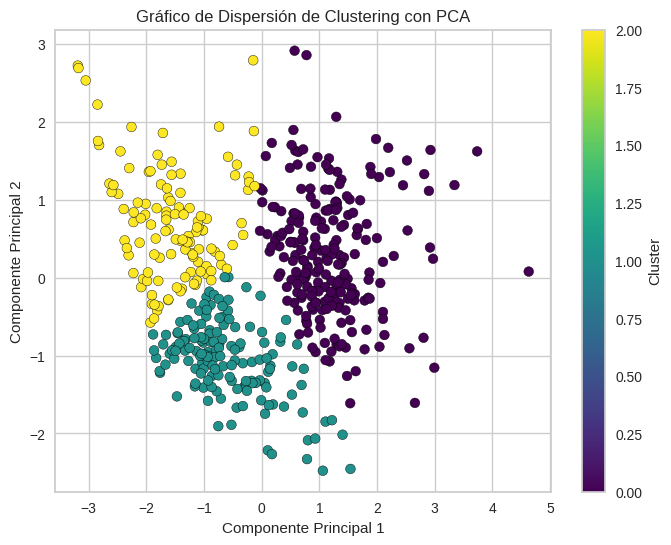

In [ ]:
# Se visualizan los clusters en un gráfico de dispersión con datos reducidos por PCA.

"""
plt.figure(figsize=(8, 6)) configura el tamaño de la figura del gráfico en pulgadas (ancho x alto).

"""
plt.figure(figsize=(8, 6))

"""
plt.scatter() crea un gráfico de dispersión. Los argumentos son los datos de las componentes principales
(pca_data_copia[:, 0] para el eje x y pca_data_copia[:, 1] para el eje y), y c=clusters_copia asigna colores
basados en las etiquetas de los clusters.

"""
plt.scatter(pca_data_copia[:, 0], pca_data_copia[:, 1], c=clusters_copia, cmap='viridis', marker='o', edgecolors='black')

"""
Se establecen el título del gráfico y las etiquetas de los ejes x e y mediante plt.title(), plt.xlabel(),
y plt.ylabel() respectivamente.

"""
plt.title('Gráfico de Dispersión de Clustering con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

"""
plt.colorbar(label='Cluster') agrega una barra de color que mapea los colores a los clusters identificados.

"""
plt.colorbar(label='Cluster')

"""
plt.show() muestra el gráfico de dispersión.

"""

plt.show()

In [ ]:
"""
print(f'Inercia: {kmeans_copia.inertia_}'): La inercia (inertia_) es una medida de la cohesión de los clusters
en el modelo K-means. Es la suma de las distancias al cuadrado de todas las muestras a sus centroides respectivos
en los clusters. Cuanto menor sea la inercia, mejor será la partición de los datos en clusters.

"""
print(f'Inercia: {kmeans_copia.inertia_}')

Inercia: 477.0852885342899


In [ ]:
"""
Este código utiliza la función silhouette_score de la librería sklearn.metrics para calcular el
puntaje de silhouette de un modelo de clustering (en este caso, un modelo K-Means) en base a los
datos y las etiquetas de los clusters.

"""
silhouette_avg_copia = silhouette_score(pca_data_copia, kmeans_copia.labels_)


In [ ]:
"""
Aquí se imprime en pantalla el valor almacenado en la variable silhouette_avg_copia, mostrando el puntaje
de silhouette calculado para nuestro modelo de clustering.

"""
print("El puntaje de Silhouette es:", silhouette_avg_copia)

El puntaje de Silhouette es: 0.4411509441188004


# **Comparación de los scores obtenidos en el modelo que mantiene los valores negativos en Salario y Limite_TC y en el que fueron imputados como cero**

Se utilizan la inercia y silhouette como indicadores para evaluar la efectividad de los modelos K-means. La inercia mide qué tan compactos están los clusters (más bajo es mejor), mientras que la silueta es una medida de qué tan bien separados están los clusters (más cercano a 1 es mejor).

En este caso, el primer modelo (sin imputar a cero los valores negativos) tiene una inercia ligeramente mayor (480.2444) que el segundo modelo (con valores negativos imputados a cero) (477.0852), lo que indica que los clusters podrían ser un poco menos compactos en el primer modelo. Sin embargo, la diferencia no es significativa.

En cuanto a la silueta, el segundo modelo tiene un valor ligeramente mayor (0.4411) que el primer modelo (0.4406), lo que sugiere que los clusters están un poco mejor definidos y separados en el segundo modelo.

Dado que la diferencia entre ambas métricas es bastante pequeña, podría ser difícil determinar un claro ganador. Pero si tuviera que elegir, el segundo modelo con la imputación de outliers como ceros parece ofrecer una ligera ventaja, ya que tiene una silueta ligeramente mejor, lo que indica una mejor separación entre clusters.

# **Perfilamiento de los clusters**

In [ ]:
"""
Lo que hace este código es agregar una nueva columna llamada 'cluster' al DataFrame df_customers_copia
y asignar los valores de la variable clusters_copia a esta nueva columna. Cada valor en la columna 'cluster'
corresponderá a la etiqueta del cluster al que se asignó cada fila del DataFrame df_customers_copia después
de aplicar el algoritmo K-Means. Esto facilita el análisis y la segmentación de los datos basados
en los clusters identificados.

"""
df_customers_copia['cluster']= clusters_copia

In [ ]:
# Se realiza un perfilamiento de los clusters, para lo cual se calculan sus estadísticas descriptivas.
cluster_stats_copia = df_customers_copia.groupby('cluster').agg(['mean','min','max','std'])
print("Estadísticas por cluster:")
print(cluster_stats_copia)

Estadísticas por cluster:
              Salario                                  Credito_tipo_1          \
                 mean       min       max          std           mean min max   
cluster                                                                         
0        11369.397555    250.61  23958.32  3972.745905       0.672489   0   1   
1         8334.567047      0.00  14264.00  2818.216975       0.429530   0   1   
2        18049.326311  11432.87  30041.40  3741.808455       0.713115   0   1   

                  Credito_tipo_2                       Limite_TC            \
              std           mean min max       std          mean       min   
cluster                                                                      
0        0.470333       0.414847   0   1  0.493775  61266.810262  40067.41   
1        0.496679       0.765101   0   1  0.425366  36599.544966      0.00   
2        0.454173       0.163934   0   1  0.371743  24822.362459      0.00   

                  

La empresa financiera que contrató el estudio tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

La variable Limite_TC que indica el límite de crédito de la tarjeta del cliente, de acuerdo a los objetivos del cliente juega un papel clave en la determinación del desarollo e instrumentación del nuevo producto financiero.

De acuerdo a esto haremos el perfilamiento de los clusters con relación a esta variable. Se pueden identificar 3 clusters con características diferenciadas en cuanto al límite de crédito de los clientes. El cluster número 2 tiene una media de límite de crédito de la tarjeta de 24822.36, un valor mínimo de 0 y un máximo de 50270.77. En tanto que el cluster número 1 tiene como media un valor de 36599.54, mínimo de 0 y máximo de 87026.27. Por último tenemos el cluster número 0 que presenta los valores siguientes: media 61266.81, mínimo 40067.41, y máximo 118636.82.
A partir de estos datos se podría decir que el cluster 2 se puede denominar como de 'límite de crédito bajo', el cluster 1 de 'límite de crédito medio' y el cluster 0 de 'límite de crédito alto'.


# **Aplicación del modelo de clustering que tiene los valores negativos sin imputar a cero, a la base de datos con 50 clientes adicionales**

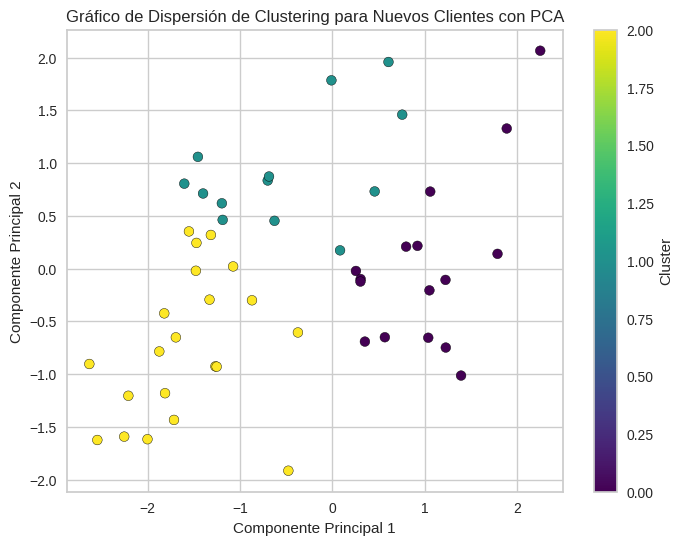

In [ ]:
# Aplicamos el modelo entrenado a los nuevos datos (los 50 clientes adicionales) con PCA
# Se cargan los nuevos datos y se aplican las mismas transformaciones de escala y PCA
new_data = pd.read_csv('/content/drive/MyDrive/new_customers.csv')
scaled_new_data = scaler.transform(new_data[features])
pca_new_data = pca.transform(scaled_new_data)

# Predecimos los clusters para los nuevos datos con PCA
new_clusters = kmeans.predict(pca_new_data)

# Visualizamos los nuevos clusters en un gráfico de dispersión con datos reducidos por PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_new_data[:, 0], pca_new_data[:, 1], c=new_clusters, cmap='viridis', marker='o', edgecolors='black')
plt.title('Gráfico de Dispersión de Clustering para Nuevos Clientes con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Se unen los nuevos datos con los datos originales
all_data = np.vstack([pca_data, pca_new_data])

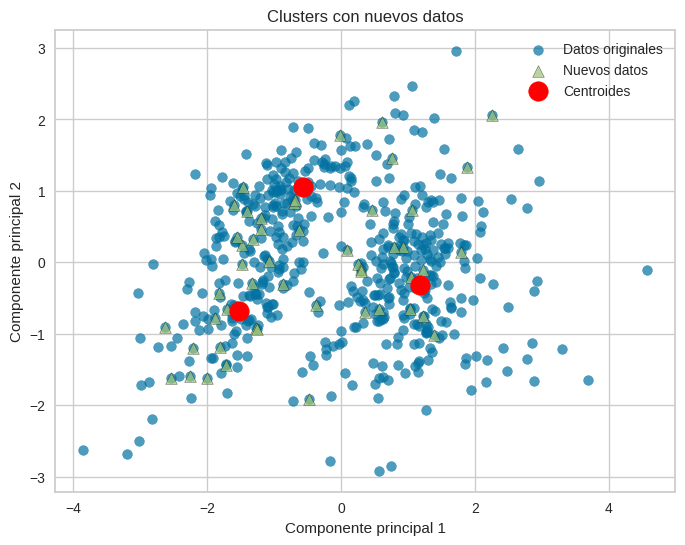

In [ ]:
# Visualización de todos los datos (originales + nuevos)
plt.figure(figsize=(8, 6))
plt.scatter(all_data[:, 0], all_data[:, 1], cmap='viridis', s=50, alpha=0.7, label='Datos originales')
plt.scatter(all_data[-50:, 0], all_data[-50:, 1], cmap='viridis', s=70, marker='^', edgecolors='black', alpha=0.7, label='Nuevos datos')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=200, label='Centroides')
plt.title('Clusters con nuevos datos')
plt.legend()
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


# **Breve resumen del estudio para los clientes**

**Objetivo del estudio:**

El objetivo del estudio es generar un modelo de agrupamiento de los clientes contenidos en la base de datos que ayude en el desarrollo e implementación de un nuevo producto que tendrá características específicas según el límite de crédito del cliente.

Para la determinación de la cantidad óptima de grupos en que se debe segmentar a los clientes utilizamos K-means, que es un algoritmo de agrupamiento o clustering que se utiliza para dividir un conjunto de datos en grupos o clusters. Su objetivo es particionar los datos en grupos homogéneos, donde los elementos dentro de un mismo grupo sean similares entre sí y diferentes a los elementos de otros grupos.



**Análisis exploratorio de datos**

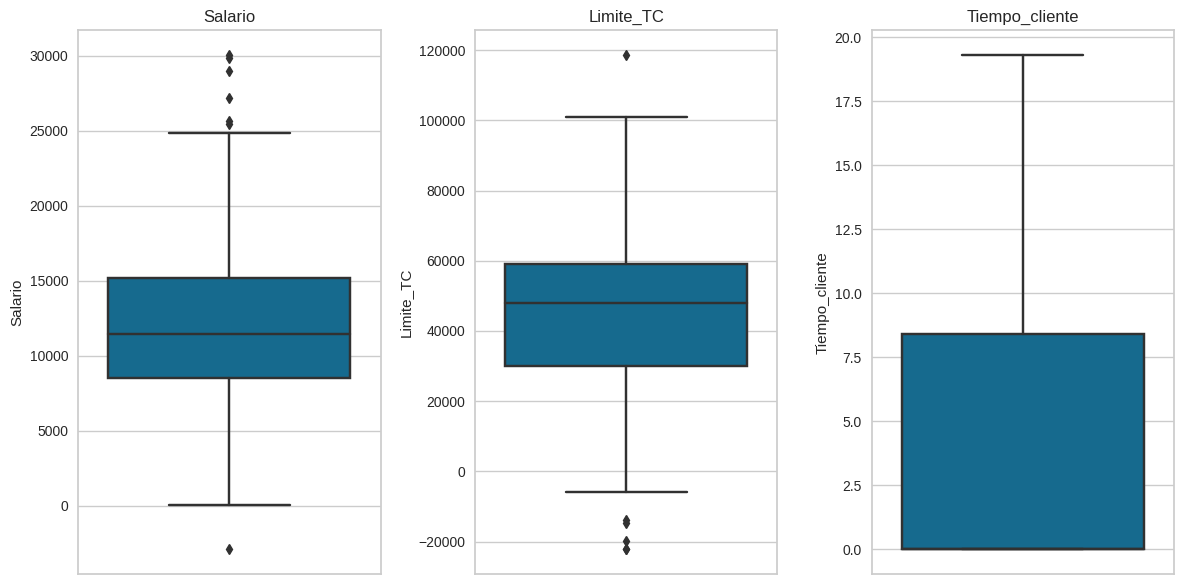

En el gráfico de la variable Salario se observa la presencia de un valor negativo. Consideramos que puede haber sido un error de quien capturo los datos inicialmente en la base de datos. Sugerimos sustituir ese valor por cero, para que no afecte a los estadísticos descriptivos, en esa variable, así como el posterior modelo de clasificación que construiremos.
Si observamos el boxplot de la variable Limite_TC se detecta la presencia de varios valores negativos. En principio no parece lógico que alguien tenga un límite de crédito negativo, o tiene 0 o un valor entero positivo. Pero les consulto por este medio, si esto es así o efectivamente tiene un significado el valor negativo en el límite de la tarjeta de crédito.
Hicimos una copia del data frame original, conservando los datos originales por un lado e imputando los valores negativos como 0 en otro data frame.
Posteriormente se compararon los resultados a los que se llegaron siguiendo el camino de mantener los valores negativos o imputándolos como 0.

**Determinación del número óptimo de clusters o grupos**

Método del codo: Éste método es una herramienta utilizada en data science para encontrar el número óptimo de clusters en un conjunto de datos. Los clusters son grupos de puntos de datos similares entre sí.

Para entender fácilmente este método, imagina que tienes un conjunto de datos y quieres agruparlos en distintos grupos, pero no sabes cuántos grupos deberías tener. El método del codo te ayuda a determinar este número.

Primero, se ejecuta un algoritmo de agrupamiento, como K-means, con diferentes números de clusters. Luego, se grafica el número de clusters en el eje X y la variabilidad (como la suma de las distancias cuadradas dentro de cada cluster) en el eje Y.

El gráfico mostrará una curva que se asemeja a un brazo doblado (de ahí el nombre "método del codo"). La idea es identificar el punto en el que la disminución en la variabilidad (o la suma de cuadrados dentro de los clusters) deja de ser significativa, y la curva empieza a aplanarse, formando algo parecido a un "codo".

El valor en el eje X en el punto del "codo" suele indicar el número óptimo de clusters para ese conjunto de datos. Sin embargo, en algunos casos, puede resultar ambiguo. En ese punto, la interpretación puede ser subjetiva, y se debe considerar el contexto del problema y la aplicabilidad práctica de los clusters identificados.

En resumen, el método del codo es una herramienta visual que te ayuda a encontrar el número ideal de clusters al observar el punto en el gráfico donde la disminución en la variabilidad deja de ser significativa, indicando un equilibrio entre la complejidad del modelo y la eficacia de la agrupación de datos.

Como podemos observar en los siguientes gráficos el valor óptimo de clusters que resulta de la aplicación de este método es 3.

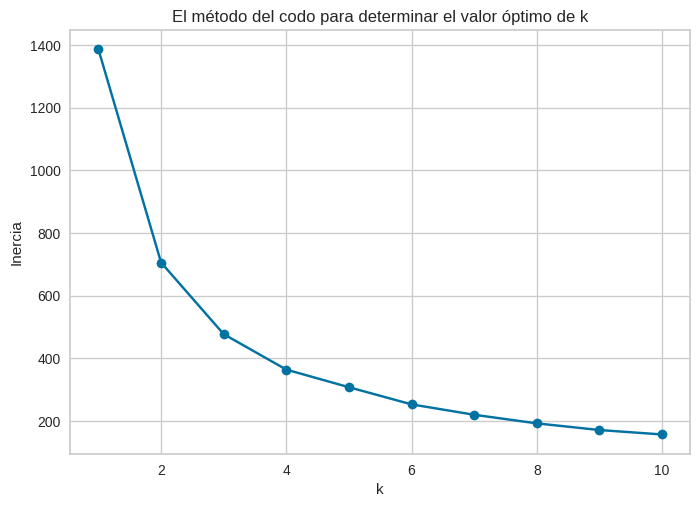

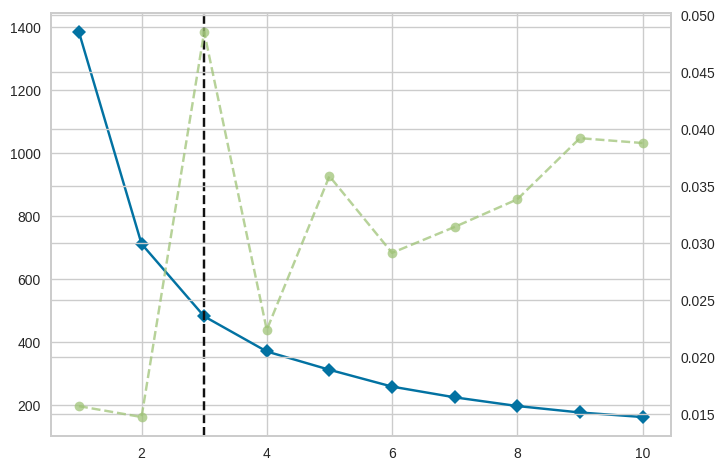

**Gráficos con los agrupamientos o clusters**

**Gráfico que muestra los tres clusters que se crean a partir de la aplicación del modelo Kmeans sin imputar los valores negativos de Salario y Limite_TC como cero**

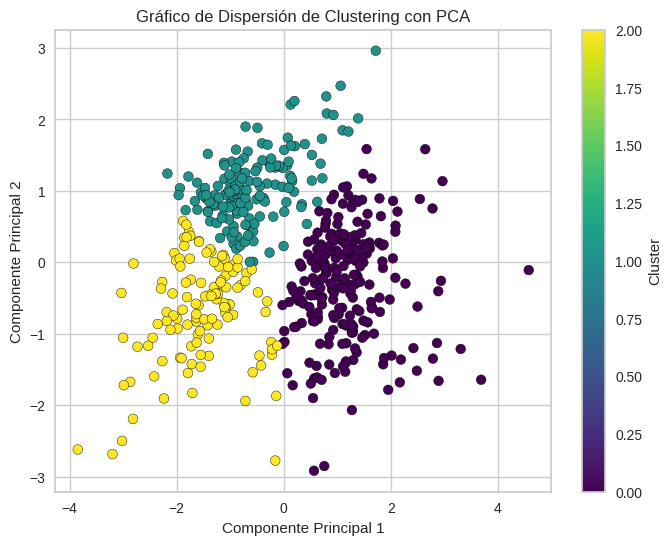

**Gráfico que muestra los tres clusters que se crean a partir de la aplicación del modelo Kmeans con los valores negativos de Salario y Limite_TC imputados como cero**

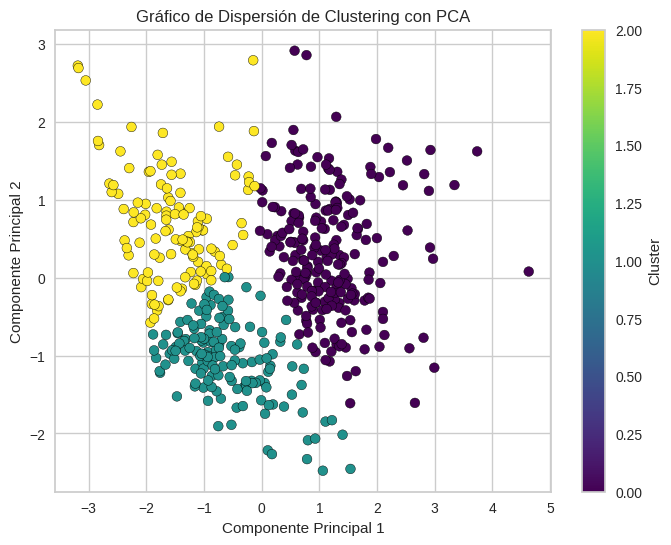

**Comparación de los scores obtenidos en el modelo que mantiene los valores negativos en Salario y Limite_TC y en el que fueron imputados como cero**

Se utilizaron inercia y silhouette como indicadores para evaluar la efectividad de los modelos K-means. La inercia mide qué tan compactos están los clusters (más bajo es mejor), mientras que la silueta es una medida de qué tan bien separados están los clusters (más cercano a 1 es mejor).

En este caso, el primer modelo (sin imputar a cero los valores negativos) tiene una inercia ligeramente mayor (480.2444) que el segundo modelo (con valores negativos imputados a cero) (477.0852), lo que indica que los clusters podrían ser un poco menos compactos en el primer modelo. Sin embargo, la diferencia no es significativa.

En cuanto a la silueta, el segundo modelo tiene un valor ligeramente mayor (0.4411) que el primer modelo (0.4406), lo que sugiere que los clusters están un poco mejor definidos y separados en el segundo modelo.

Dado que la diferencia entre ambas métricas es bastante pequeña, podría ser difícil determinar un claro ganador. Pero si tuviera que elegir, el segundo modelo con la imputación de outliers como ceros parece ofrecer una ligera ventaja, ya que tiene una silueta ligeramente mejor, lo que indica una mejor separación entre clusters.

**Perfilamiento de los clusters(se realizó con el data frame al cuál se le imputaron como cero los valores negativos de Salario y Limite_TC)**

El objetivo del estudio es generar un modelo de agrupamiento de los clientes contenidos en la base de datos que ayude en el desarrollo e implementación de un nuevo producto que tendrá características específicas según el límite de crédito del cliente.

La variable Limite_TC que indica el límite de crédito de la tarjeta del cliente, de acuerdo a los objetivos del estudio, juega un papel clave en la determinación del desarollo e instrumentación del nuevo producto financiero.

De acuerdo a esto hicimos el perfilamiento de los clusters con relación a esta variable. Se pueden identificar 3 clusters con características diferenciadas en cuanto al límite de crédito de los clientes. El cluster número 2 tiene una media de límite de crédito de la tarjeta de 24822.36, un valor mínimo de 0 y un máximo de 50270.77. En tanto que el cluster número 1 tiene como media un valor de 36599.54, mínimo de 0 y máximo de 87026.27. Por último tenemos el cluster número 0 que presenta los valores siguientes: media 61266.81, mínimo 40067.41, y máximo 118636.82.

A partir de estos datos se podría decir que el cluster 2 se puede denominar como de 'límite de crédito bajo', el cluster 1 de 'límite de crédito medio' y el cluster 0 de 'límite de crédito alto'.
